In [86]:
import pandas as pd
import numpy as np

in_pop_corr = pd.read_csv('genetic_correlation_summary_eas.csv')
in_pop_corr["p1"] = in_pop_corr["p1"].apply(lambda x: x.split('/')[-1].split('_')[0])
in_pop_corr["p2"] = in_pop_corr["p2"].apply(lambda x: x.split('/')[-1].split('_')[0])
del in_pop_corr["source_file"]
display(in_pop_corr)
in_pop_corr.to_csv('genetic_correlation_summary_cas.csv', sep='\t', header=True, index=False)

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,alt,creatinine,NaN,NaN,NaN,NaN,0.0621,0.5271,1.0078,0.0149,0.0107,0.0092
1,alt,hb,NaN,NaN,NaN,NaN,0.2042,0.5233,0.9988,0.0130,0.2104,0.0095
2,ast,alt,NaN,NaN,NaN,NaN,-1.0290,0.5813,1.0274,0.0133,0.7174,0.0115
3,ast,bmi,NaN,NaN,NaN,NaN,0.0417,0.5059,1.0069,0.0132,0.1150,0.0088
4,ast,bun,NaN,NaN,NaN,NaN,0.2288,0.5310,1.0066,0.0132,0.0199,0.0098
...,...,...,...,...,...,...,...,...,...,...,...,...
318,waist,wbc,NaN,NaN,NaN,NaN,-0.9144,0.5375,1.0344,0.0121,0.2812,0.0099
319,wbc,alt,NaN,NaN,NaN,NaN,-1.0290,0.5813,1.0274,0.0133,0.1393,0.0091
320,wbc,creatinine,NaN,NaN,NaN,NaN,0.0621,0.5271,1.0078,0.0149,-0.0245,0.0104
321,wbc,glucose,NaN,NaN,NaN,NaN,0.0051,0.4700,1.0086,0.0136,0.0762,0.0103


In [87]:
import pandas as pd
import numpy as np

in_pop_corr = pd.read_csv('genetic_correlation_summary_eur.csv')
in_pop_corr["p1"] = in_pop_corr["source_file"].apply(lambda x: x.split('/')[-1].split('_')[0])
in_pop_corr["p2"] = in_pop_corr["source_file"].apply(lambda x: x.split('/')[-1].split('_')[1])
del in_pop_corr["source_file"]
display(in_pop_corr)
in_pop_corr.to_csv('genetic_correlation_summary_eur.csv', sep='\t', header=True, index=False)

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,alt,creatinine,-0.0242,0.0191,-1.2662,2.055000e-01,0.2329,0.0564,1.0289,0.1588,-0.0183,0.0140
1,alt,hb,NaN,NaN,NaN,NaN,-0.0385,0.3405,1.4428,0.4081,0.2094,0.0150
2,ast,alt,NaN,NaN,NaN,NaN,0.4954,0.3627,0.9593,0.2682,0.7261,0.0260
3,ast,bmi,NaN,NaN,NaN,NaN,0.2762,0.0198,1.0440,0.0549,0.0983,0.0125
4,ast,bun,NaN,NaN,NaN,NaN,0.0895,1.1550,1.7418,0.8632,0.0178,0.0104
...,...,...,...,...,...,...,...,...,...,...,...,...
345,waist,wbc,0.2913,0.0268,10.8608,1.772400e-27,0.2070,0.0198,1.1524,0.0560,0.2013,0.0139
346,wbc,alt,0.0736,0.0422,1.7453,8.090000e-02,0.4954,0.3627,0.9593,0.2682,0.0629,0.0158
347,wbc,creatinine,0.0061,0.0248,0.2444,8.069000e-01,0.2329,0.0564,1.0289,0.1588,0.0363,0.0161
348,wbc,glucose,NaN,NaN,NaN,NaN,-0.2451,0.2286,2.1280,0.8695,0.0388,0.0219


热图已成功保存到: results_heatmap.png


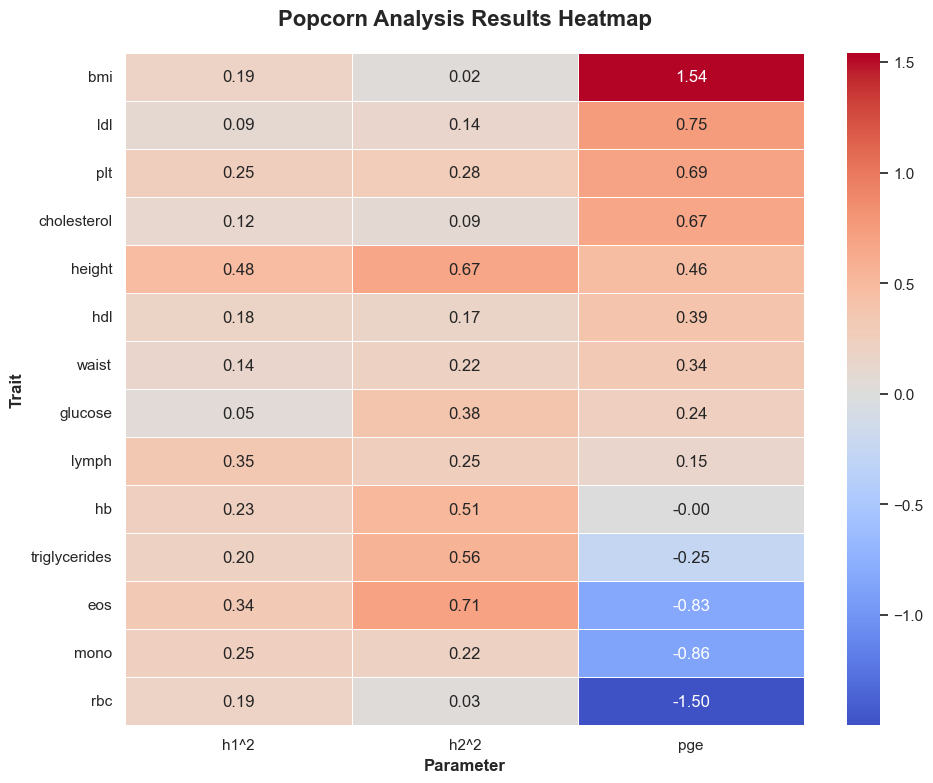

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results_heatmap(tsv_file_path):
    """
    读取TSV文件并将其中的结果可视化为热图。
    """
    try:
        # 读取TSV文件
        df = pd.read_csv(tsv_file_path, sep='\t')
    except FileNotFoundError:
        print(f"错误: 未找到文件 '{tsv_file_path}'。请先运行数据提取脚本。")
        return

    if df.empty:
        print("错误: TSV文件为空。")
        return

    # --- 数据重塑 (Data Pivoting) ---
    # 将长格式的数据转换为宽格式的矩阵，这是生成热图所必需的。
    # 行(index)为性状(Trait)，列(columns)为参数(Parameter)，值(values)为参数值(Value)。
    heatmap_data = df.pivot_table(index='Trait', columns='Parameter', values='Value')
    
    # 我们可以按pge的值对行进行排序，使图表更具可读性
    if 'pge' in heatmap_data.columns:
        heatmap_data = heatmap_data.sort_values(by='pge', ascending=False)


    # --- 开始绘图 ---
    plt.figure(figsize=(10, 8)) # 可以根据性状多少调整尺寸

    # 使用seaborn创建热图
    heatmap = sns.heatmap(
        heatmap_data,
        annot=True,      # 在每个单元格中显示数值
        fmt=".2f",       # 数值格式化为两位小数
        linewidths=.5,   # 单元格之间的线条宽度
        cmap='coolwarm', # 选择一个发散的色板 (比如从负到正)
        center=0         # 将颜色刻度的中心设置为0
    )

    # --- 美化图表 ---
    
    # 设置标题和坐标轴标签
    plt.title('Popcorn Analysis Results Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Parameter', fontsize=12, fontweight='bold')
    plt.ylabel('Trait', fontsize=12, fontweight='bold')
    
    # 旋转x轴和y轴的标签，确保它们清晰可读
    plt.xticks(rotation=0) 
    plt.yticks(rotation=0)

    # 优化布局
    plt.tight_layout()

    # 保存图表
    output_image_path = "results_heatmap.png"
    plt.savefig(output_image_path, dpi=300)
    
    print(f"热图已成功保存到: {output_image_path}")
    
    # 显示图表
    plt.show()


if __name__ == "__main__":
    # 假设TSV文件与脚本在同一目录下
    plot_results_heatmap("popcorn_results_cas_ukb.tsv")

成功加载人群 'EAS - CAS' 的数据，共 94 条记录。
成功加载人群 'EUR - UKB' 的数据，共 7 条记录。
成功加载跨人群PGE数据，共 14 个性状。

所有数据加载成功，正在生成热图...


g:\lishuhua\software\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
g:\lishuhua\software\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\nancyli\AppData\Local\Temp\ipykernel_20752\4248574814.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])



综合热图已成功保存到: comprehensive_genetic_heatmap.png


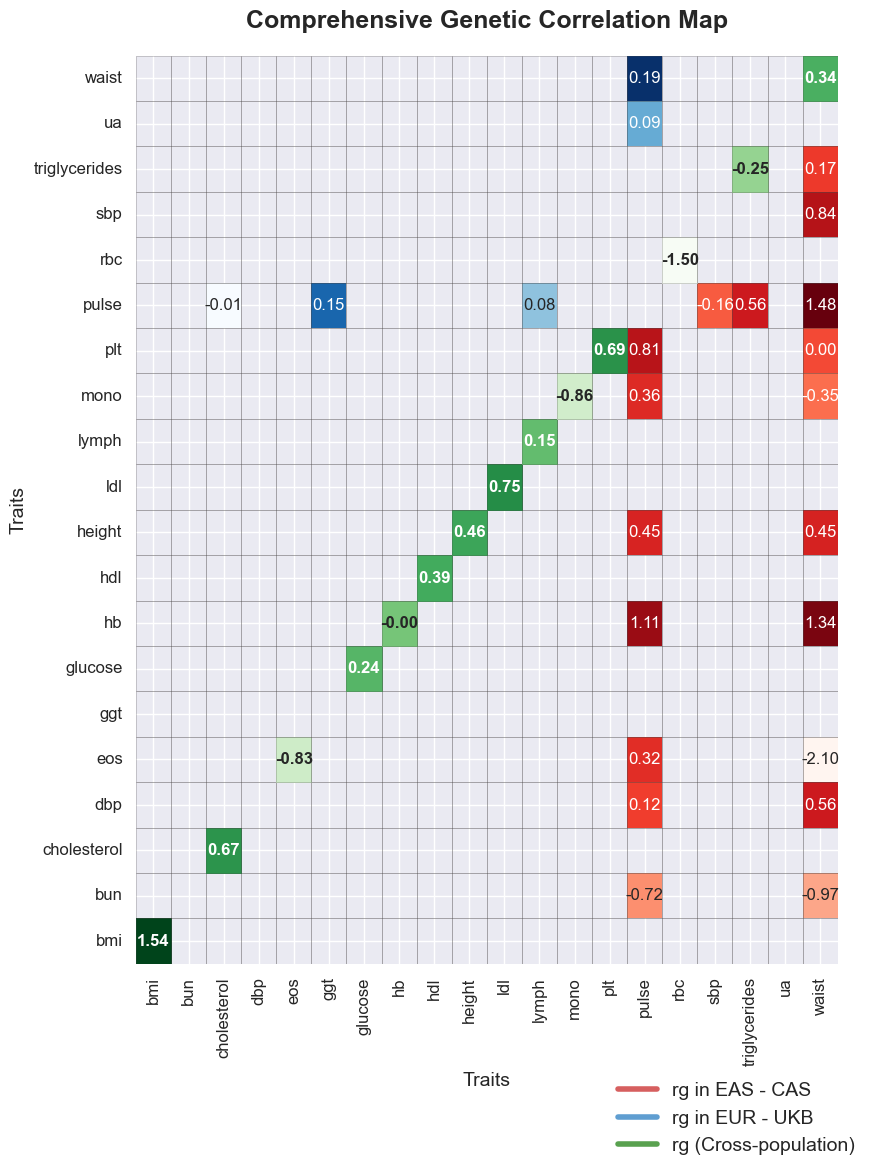

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# (The load_ldsc_rg_data and load_popcorn_pge_data functions remain the same)
def load_ldsc_rg_data(filepath, population_name):
    """加载并处理单个LDSC遗传相关性文件。"""
    try:
        df = pd.read_csv(filepath, sep='\t')
        print(u"成功加载人群 '{}' 的数据，共 {} 条记录。".format(population_name, len(df)))
        return df[['p1', 'p2', 'rg']].dropna(subset=['rg'])
    except FileNotFoundError:
        print(u"错误: 文件 '{}' 未找到。".format(filepath))
        return None

def load_popcorn_pge_data(filepath):
    """从popcorn_results.tsv加载PGE值。"""
    try:
        df = pd.read_csv(filepath, sep='\t')
        pge_data = df[df['Parameter'] == 'pge'].set_index('Trait')['Value'].to_dict()
        print(u"成功加载跨人群PGE数据，共 {} 个性状。".format(len(pge_data)))
        return pge_data
    except FileNotFoundError:
        print(u"错误: Popcorn结果文件 '{}' 未找到。".format(filepath))
        return None


def create_comprehensive_heatmap(df_pop1, df_pop2, pge_data):
    """
    创建并绘制最终的合并热图。
    上三角: 人群1内部相关性 (df_pop1)
    下三角: 人群2内部相关性 (df_pop2)
    对角线: 跨人群相关性 (pge_data)
    """
    # 1. 获取所有性状的唯一且排序的列表
    all_traits = sorted(list(
        set(df_pop1['p1']) | set(df_pop1['p2']) |
        set(df_pop2['p1']) | set(df_pop2['p2']) |
        set(pge_data.keys())
    ))
    
    # 2. 创建三个独立的、空的DataFrame
    matrix_pop1 = pd.DataFrame(index=all_traits, columns=all_traits, dtype=np.float64)
    matrix_pop2 = pd.DataFrame(index=all_traits, columns=all_traits, dtype=np.float64)
    matrix_pge = pd.DataFrame(index=all_traits, columns=all_traits, dtype=np.float64)

    # 3. 填充每个矩阵
    # 人群1矩阵 (对称填充)
    for _, row in df_pop1.iterrows():
        matrix_pop1.loc[row['p1'], row['p2']] = row['rg']
        matrix_pop1.loc[row['p2'], row['p1']] = row['rg']

    # 人群2矩阵 (对称填充)
    for _, row in df_pop2.iterrows():
        matrix_pop2.loc[row['p1'], row['p2']] = row['rg']
        matrix_pop2.loc[row['p2'], row['p1']] = row['rg']

    # 对角线矩阵 (仅填充对角线)
    for trait, pge_value in pge_data.items():
        if trait in all_traits:
            matrix_pge.loc[trait, trait] = pge_value

    # 4. 创建掩码
    mask_upper = np.triu(np.ones_like(matrix_pop1, dtype=bool), k=1)
    mask_lower = np.tril(np.ones_like(matrix_pop2, dtype=bool), k=-1)
    # 掩码对角线，~表示反转，所以只显示对角线
    mask_diag = ~np.eye(matrix_pge.shape[0], dtype=bool)

    # --- 开始绘图 ---
    fig, ax = plt.subplots(figsize=(10, 12))

    # 绘制三个部分，每个部分使用自己的掩码
    # cbar_ax用于将所有颜色条合并到一个
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    # 上三角 (人群1)
    sns.heatmap(matrix_pop1, mask=~mask_upper, cmap="Reds", annot=True, fmt=".2f", 
                ax=ax, cbar=False, annot_kws={"size": 12})
    # if na in matrix_pop1, change the cell to gray
    # 用灰色覆盖缺失值的上三角区域
    matrix_pop1 = matrix_pop1.fillna(np.nan)  # 确保填充NaN
    nan_mask = mask_upper & matrix_pop1.isna()
    sns.heatmap(matrix_pop1, mask=~nan_mask, cmap="Greys", annot=False,
                ax=ax, cbar=False)

    # 下三角 (人群2)
    sns.heatmap(matrix_pop2, mask=~mask_lower, cmap="Blues", annot=True, fmt=".2f", 
                ax=ax, cbar=False, annot_kws={"size": 12}) # 第二个不画cbar
    # 用灰色覆盖缺失值的下三角区域
    matrix_pop2 = matrix_pop2.fillna(np.nan)  # 确保填充NaN
    nan_mask = mask_lower & matrix_pop2.isna()
    sns.heatmap(matrix_pop2, mask=~nan_mask, cmap="Greys", annot=False,
                ax=ax, cbar=False)

    # 对角线 (PGE)
    sns.heatmap(matrix_pge, mask=mask_diag, cmap="Greens", annot=True, fmt=".2f", 
                ax=ax, cbar=False, annot_kws={"size": 12, "fontweight": "bold"}, linewidths=0.5, linecolor="#4B494940")
    # 用灰色覆盖缺失值的对角线区域
    matrix_pge = matrix_pge.fillna(np.nan)  # 确保填充NaN
    nan_mask = mask_diag & matrix_pge.isna()
    sns.heatmap(matrix_pge, mask=~nan_mask, cmap="Greys", annot=False,
                ax=ax, cbar=False)

    # --- 美化图表 ---
    ax.set_title('Comprehensive Genetic Correlation Map', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Traits', fontsize=14)
    ax.set_ylabel('Traits', fontsize=14)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(rotation=45, fontsize=14)
    # change the font size of x labels and y labels
    for label in ax.get_xticklabels():
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
    
    # 手动创建图例
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='#D65F5F', lw=4, label='rg in EAS - CAS'),
                       Line2D([0], [0], color='#5F9ED1', lw=4, label='rg in EUR - UKB'),
                       Line2D([0], [0], color='#59A14F', lw=4, label='rg (Cross-population)')]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=14, bbox_to_anchor=(1.05, -0.23))
    ax.invert_yaxis()  # 反转y轴，使得第一个性状在顶部
    

    fig.tight_layout(rect=[0, 0, 0.9, 1])
    # dont show the colorbar for three heatmaps
    cbar_ax.set_visible(False)

    # 保存图表
    output_image_path = "comprehensive_genetic_heatmap.png"
    plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
    print(u"\n综合热图已成功保存到: {}".format(output_image_path))
    
    plt.show()

if __name__ == '__main__':
    # --- 请在这里配置您的文件名 ---
    pop1_rg_file = 'genetic_correlation_summary_cas.csv'
    
    # *** 您需要将 'YOUR_POP2_FILE.csv' 替换为您人群2的实际文件名 ***
    pop2_rg_file = 'genetic_correlation_summary_eur.csv'  # <--- 修改这里
    
    popcorn_pge_file = 'popcorn_results_cas_ukb.tsv'

    data_pop1 = load_ldsc_rg_data(pop1_rg_file, 'EAS - CAS')
    data_pop2 = load_ldsc_rg_data(pop2_rg_file, 'EUR - UKB')
    pge_values = load_popcorn_pge_data(popcorn_pge_file)
    # display(pge_values)
    # fill na in the trait that pge_values is missing but in data_pop1 or data_pop2
    for trait in set(data_pop1['p1']).union(set(data_pop1['p2'])).union(set(data_pop2['p1'])).union(set(data_pop2['p2'])):
        if trait not in pge_values:
            pge_values[trait] = np.nan
    # display(data_pop2)

     # 仅当所有数据均成功加载时才生成热图

    if data_pop1 is not None and data_pop2 is not None and pge_values is not None:
        print(u"\n所有数据加载成功，正在生成热图...")
        create_comprehensive_heatmap(data_pop1, data_pop2, pge_values)
    else:
        print(u"\n因文件缺失或读取失败，无法生成图表。请检查文件名和文件内容。")

成功加载人群 'EAS - CAS' 的数据，共 323 条记录。
成功加载人群 'EUR - UKB' 的数据，共 350 条记录。
成功加载跨人群PGE数据，共 14 个性状。

所有数据加载成功，正在生成热图...

综合热图已成功保存到: comprehensive_genetic_heatmap.png


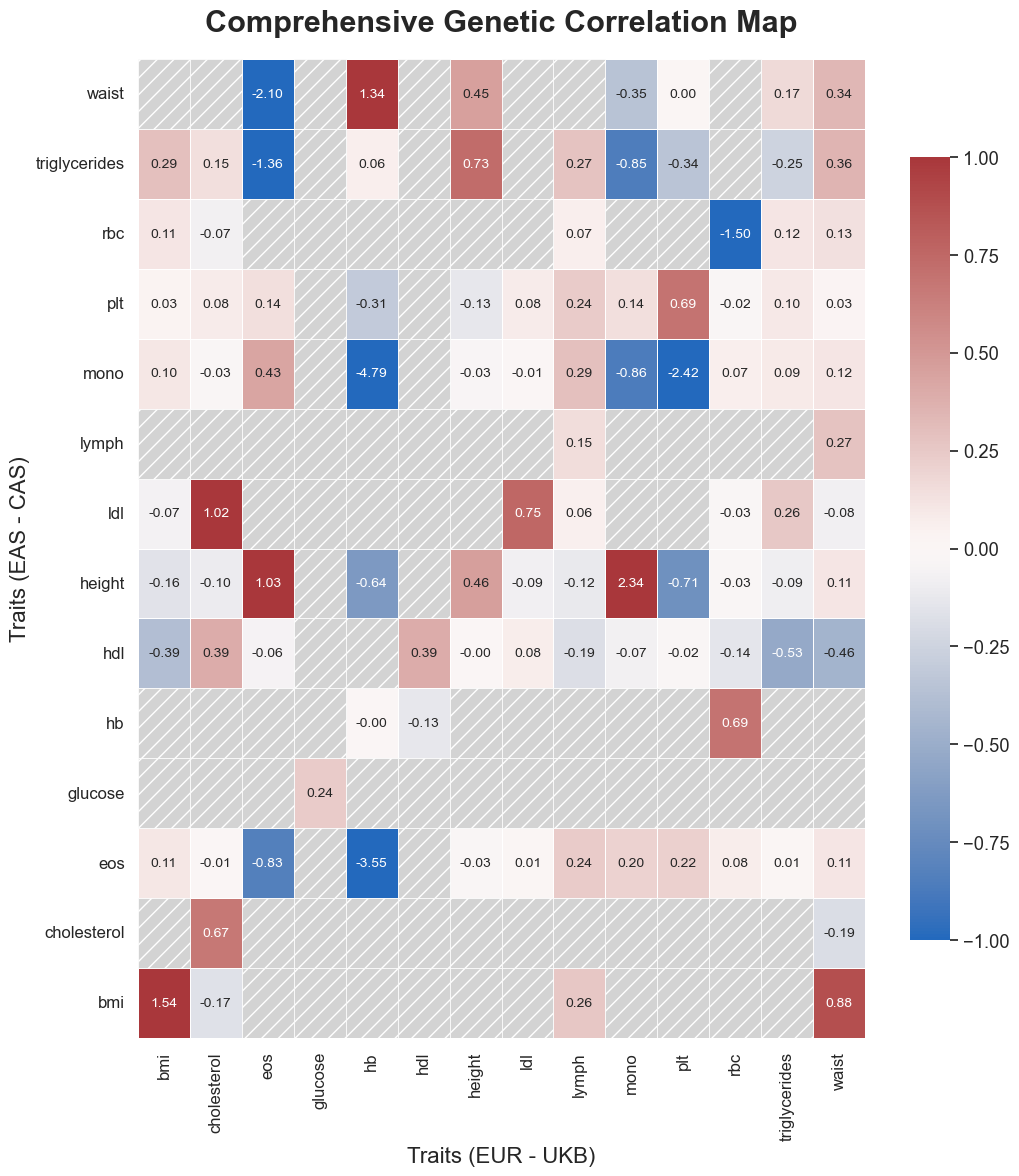

In [92]:
# (load_ldsc_rg_data 和 load_popcorn_pge_data 函数保持不变)

def create_comprehensive_heatmap(df_pop1, df_pop2, pge_data):
    """
    创建并绘制最终的合并热图。
    上三角: 人群1内部相关性 (df_pop1)
    下三角: 人群2内部相关性 (df_pop2)
    对角线: 跨人群相关性 (pge_data)
    NA值: 灰色斜线
    """
    # 1. 获取所有性状的唯一且排序的列表
    all_traits = sorted(list(
        set(df_pop1['p1']) | set(df_pop1['p2']) |
        set(df_pop2['p1']) | set(df_pop2['p2']) |
        set(pge_data.keys())
    ))
    
    # 2. 创建一个主数据矩阵
    matrix = pd.DataFrame(index=all_traits, columns=all_traits, dtype=np.float64)
    
    # 填充上三角 (人群1)
    for _, row in df_pop1.iterrows():
        matrix.loc[row['p1'], row['p2']] = row['rg']
    
    # 填充下三角 (人群2)
    for _, row in df_pop2.iterrows():
        matrix.loc[row['p2'], row['p1']] = row['rg']
        
    # 填充对角线 (PGE)
    for trait, pge_value in pge_data.items():
        if trait in all_traits:
            matrix.loc[trait, trait] = pge_value
    # only keep the trait that exist value in PGE
    matrix = matrix.loc[[trait for trait in all_traits if trait in pge_data], [trait for trait in all_traits if trait in pge_data]]

    # 3. 创建掩码
    # 我们创建一个完整的矩阵，然后用颜色区分不同部分
    # 这里我们不再需要复杂的掩码，因为我们将根据值来决定颜色
    
    # --- 开始绘图 ---
    fig, ax = plt.subplots(figsize=(12, 12))

    # 绘制基础热图，NA值将是透明的
    sns.heatmap(matrix, cmap="vlag", annot=True, fmt=".2f", 
                ax=ax, cbar=True, annot_kws={"size": 10}, center=0, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1,
                linewidths=0.5, linecolor='white')
    # the max and min of color bar is -1 to 1
    # sns.heatmap(matrix, cmap="vlag", annot=True, fmt=".2f", 
    #             ax=ax, cbar=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8},
    #             vmin=-1, vmax=1, linewidths=0.5,

    # --- 覆盖NA单元格为灰色斜线 ---
    from matplotlib.patches import Rectangle, Patch
    for (i, j), val in np.ndenumerate(matrix):
        if pd.isna(val):
            # i是行索引, j是列索引
            # Rectangle的坐标是(x, y)，对应(j, i)
            ax.add_patch(Rectangle((j, i), 1, 1, fill=True, facecolor='lightgrey', hatch='//', edgecolor='white', lw=0.5))

    # --- 美化图表 ---
    ax.set_title('Comprehensive Genetic Correlation Map', fontsize=22, fontweight='bold', pad=20)
    ax.set_xlabel('Traits (EUR - UKB)', fontsize=16)
    ax.set_ylabel('Traits (EAS - CAS)', fontsize=16)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    for label in ax.get_xticklabels():
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
    
    # 反转Y轴，使原点在左下角
    ax.invert_yaxis()

    # # 手动创建图例
    # from matplotlib.lines import Line2D
    # legend_elements = [Line2D([0], [0], color='#5A8EAF', lw=4, label='EAS(CAS) - rg'),
    #                    Line2D([0], [0], color='#E67F83', lw=4, label='EUR(UKB) - rg'),
    #                    Line2D([0], [0], color='#59A14F', lw=4, label='rg (Cross-population)'),
    #                    Patch(facecolor='lightgrey', hatch='//', label='NA Value')]
    # # 这里我们简化图例，因为对角线的值还是在同一个颜色条上
    # ax.legend(handles=legend_elements, loc='upper right', fontsize=14)

    fig.tight_layout(rect=[0, 0, 0.9, 1])

    # 保存图表
    output_image_path = "comprehensive_genetic_heatmap.png"
    plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
    print(u"\n综合热图已成功保存到: {}".format(output_image_path))
    
    plt.show()

# (The rest of the script remains the same, but you might need to adjust the main block
# if you used the previous version's separate matrices logic)
if __name__ == '__main__':
    # --- 请在这里配置您的文件名 ---
    pop1_rg_file = 'genetic_correlation_summary_cas.csv'
    pop2_rg_file = 'genetic_correlation_summary_eur.csv' # <--- 确保您有这个文件
    popcorn_pge_file = 'popcorn_results_cas_ukb.tsv'

    data_pop1 = load_ldsc_rg_data(pop1_rg_file, 'EAS - CAS')
    data_pop2 = load_ldsc_rg_data(pop2_rg_file, 'EUR - UKB')
    pge_values = load_popcorn_pge_data(popcorn_pge_file)

    if data_pop1 is not None and data_pop2 is not None and pge_values is not None:
        print(u"\n所有数据加载成功，正在生成热图...")
        create_comprehensive_heatmap(data_pop1, data_pop2, pge_values)
    else:
        print(u"\n因文件缺失或读取失败，无法生成图表。请检查文件名和文件内容。")